<h1>Forecasting number of Air Passengers for next 10 years</h1>

# 1. Data preparation

- Importing all the required libraries for analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

- Download and Read the dataset file and checking the size of file

In [5]:
!wget https://raw.githubusercontent.com/juntaoduan/Time-Series-Analysis_Classical-and-NeuralNet/master/data/AirPassengers.csv

--2021-05-19 14:42:33--  https://raw.githubusercontent.com/juntaoduan/Time-Series-Analysis_Classical-and-NeuralNet/master/data/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1745 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv.1’

AirPassengers.csv.1 100%[===================>]   1.70K  --.-KB/s    in 0s      

2021-05-19 14:42:33 (27.0 MB/s) - ‘AirPassengers.csv.1’ saved [1745/1745]



In [6]:
data=pd.read_csv('/content/AirPassengers.csv', header = 0,  names = ['Month', 'Passengers'])
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


- Visualizing the Time Series plot for the number of Air Passengers 

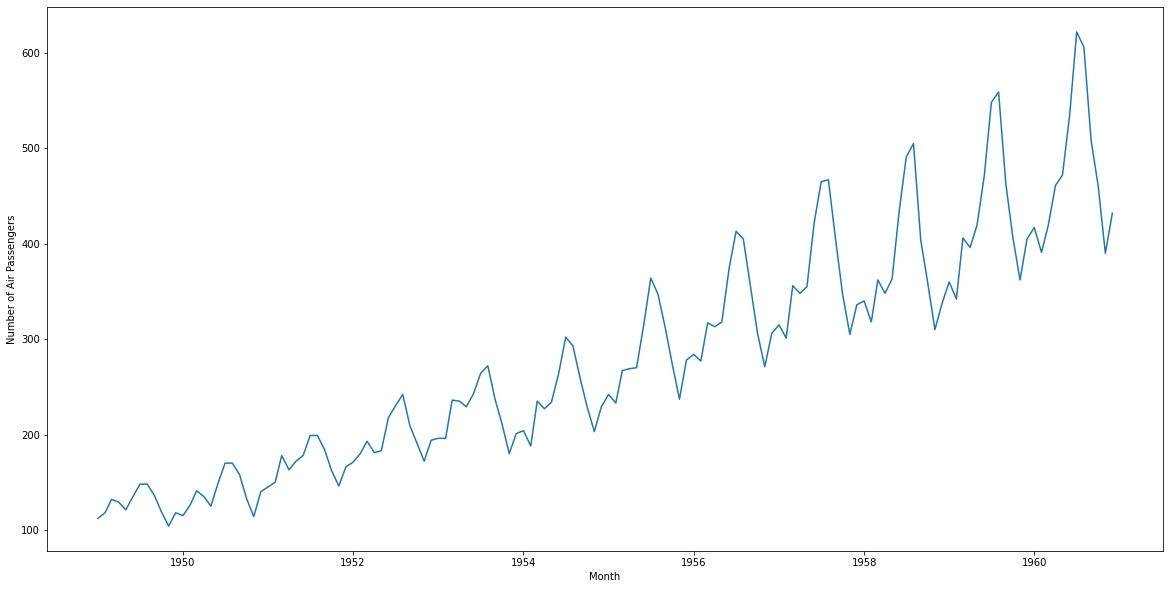

In [7]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

# 2. Checking stationarity

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [8]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean)
print(rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary since mean and variance is not constant

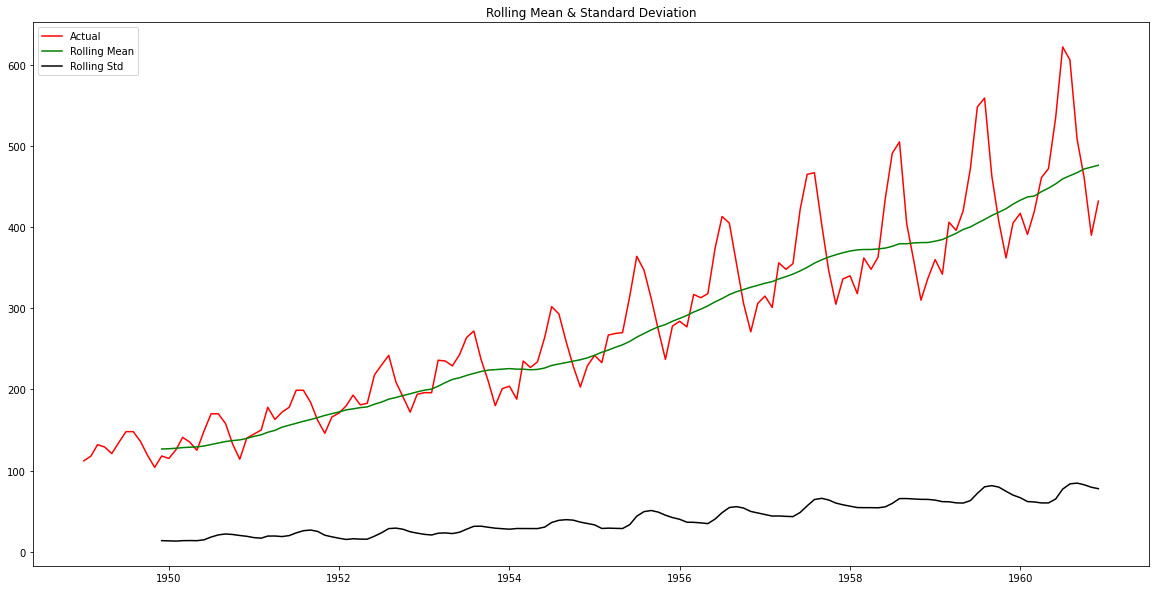

In [9]:
plt.figure(figsize=(20,10))
plt.plot(data, color='red', label='Actual')
plt.plot(rolmean, color='green', label='Rolling Mean') 
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [10]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

# 3. Make data stationary

## create differenced data

In [11]:
data_diff = data.diff(periods=1, axis=0).dropna()

## Defining function for Rolling Mean and Standard Deviation & ADF test

In [12]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean is stablized but standard deviation is still varying.
- From ADF, we can not reject the null hypothesis since p-value is  0.054 (significance level)

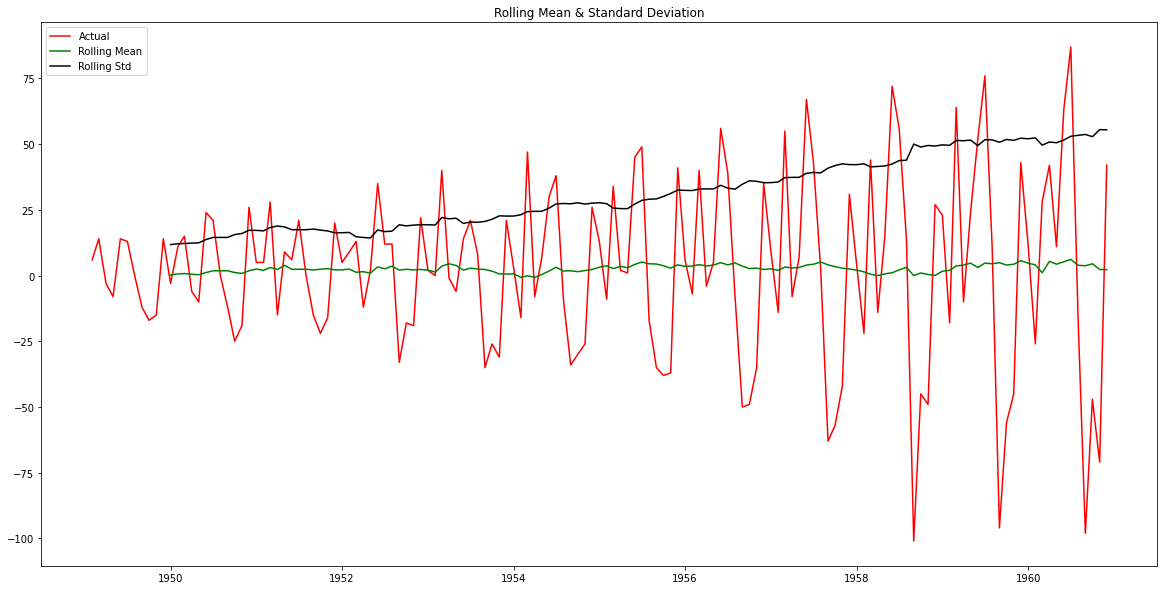

Dickey-Fuller Test: 
Test Statistic           -2.829267
p-value                   0.054213
Lags Used                12.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [13]:
stationarity(data_diff)

- standardize by removing rolling mean

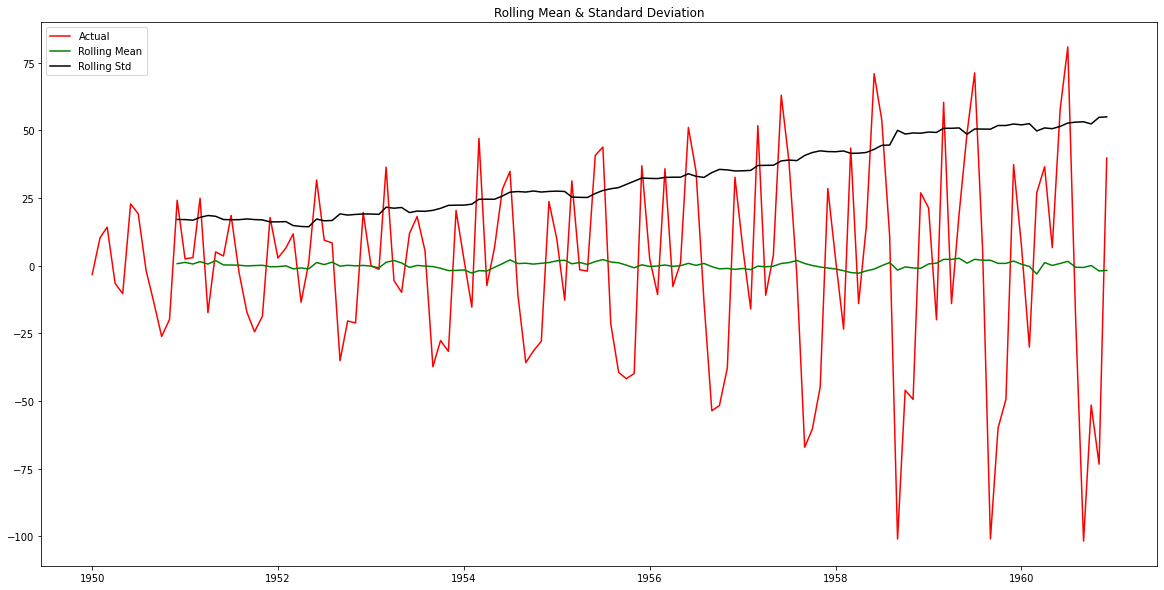

Dickey-Fuller Test: 
Test Statistic           -3.154483
p-value                   0.022775
Lags Used                12.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [14]:
data_diff = data - data.rolling(12).mean()
data_diff = data_diff.diff(1).dropna()
stationarity(data_diff)

We see it passes the Dickey-Fuller test but still have a diverging variation.

# log transform and standardize by removing rolling mean
- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

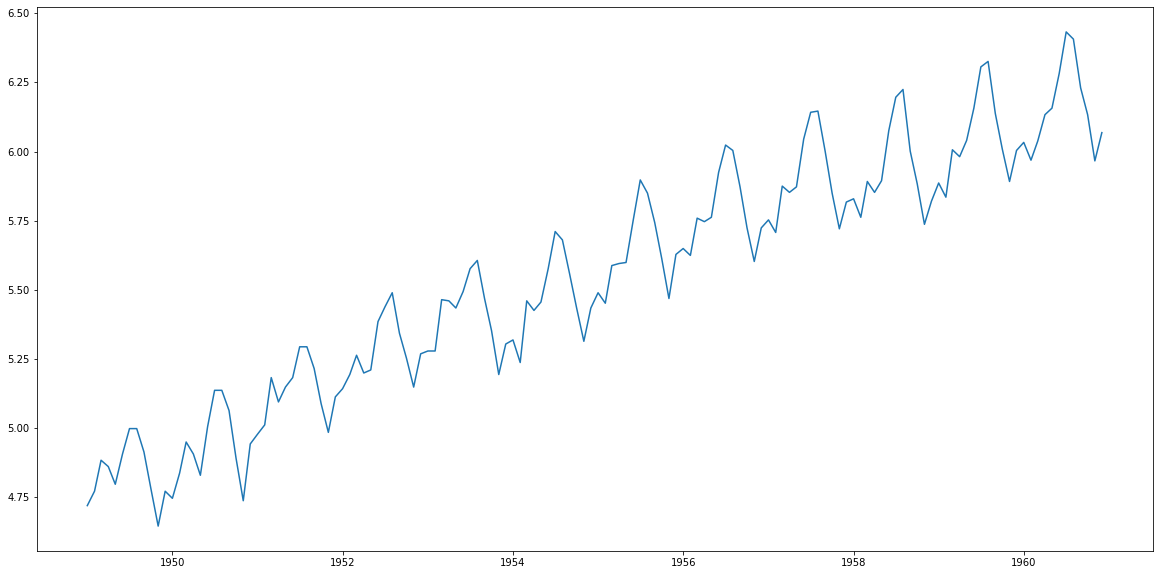

In [15]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

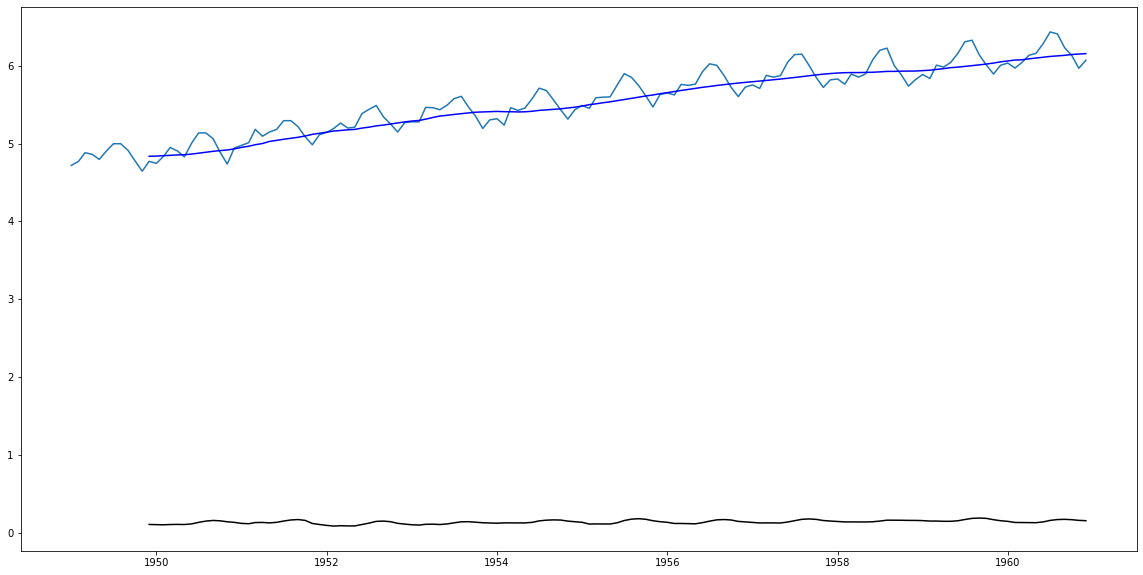

In [16]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue', label='Rolling Mean')
plt.plot(MStd, color='black', label='Rolling Std')

### Method 1: Make data stationary  by log and removing moving average

In [17]:
data_log_diff=data_log-MAvg
data_log_diff=data_log_diff.dropna()
data_log_diff

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis since p-value is less than 0.05 (significance level). Our differenced data is now stationary

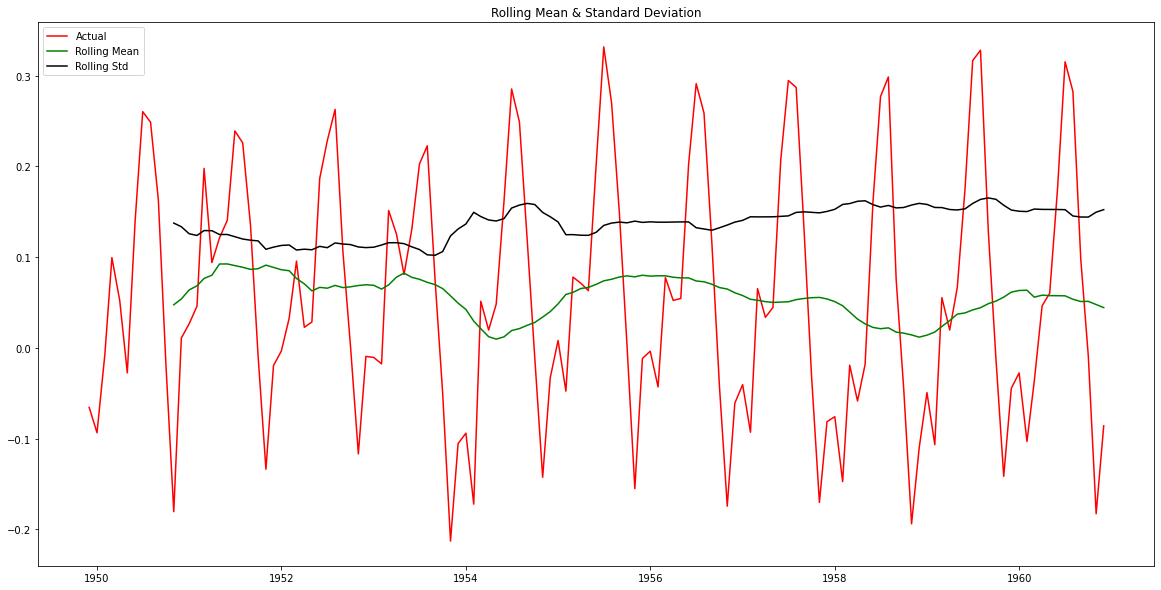

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [18]:
stationarity(data_log_diff)

###  Method 2: Make data stationary  by log and removing exponential smoothed trend

- Checking for Trend stationarity and performing exponential smoothing

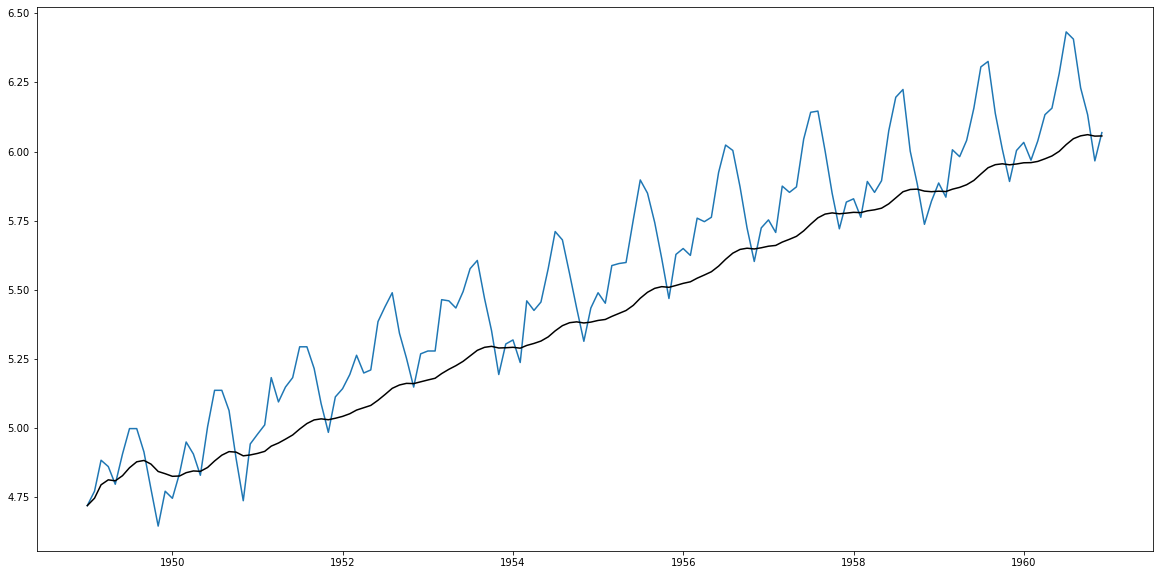

In [19]:
plt.figure(figsize=(20,10))
expsm_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(expsm_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

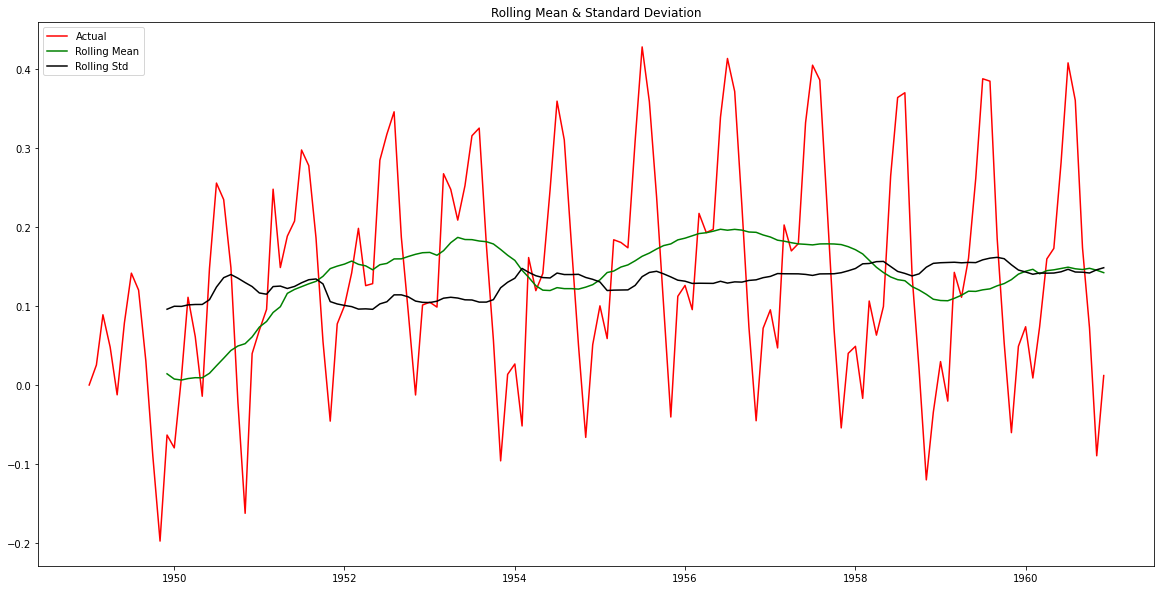

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [20]:
expsm_data_diff=data_log-expsm_data
stationarity(expsm_data_diff)

- From above graph and ADF test, we conclude, it is stationary

###  Method 3: Make data stationary  by log and differencing 

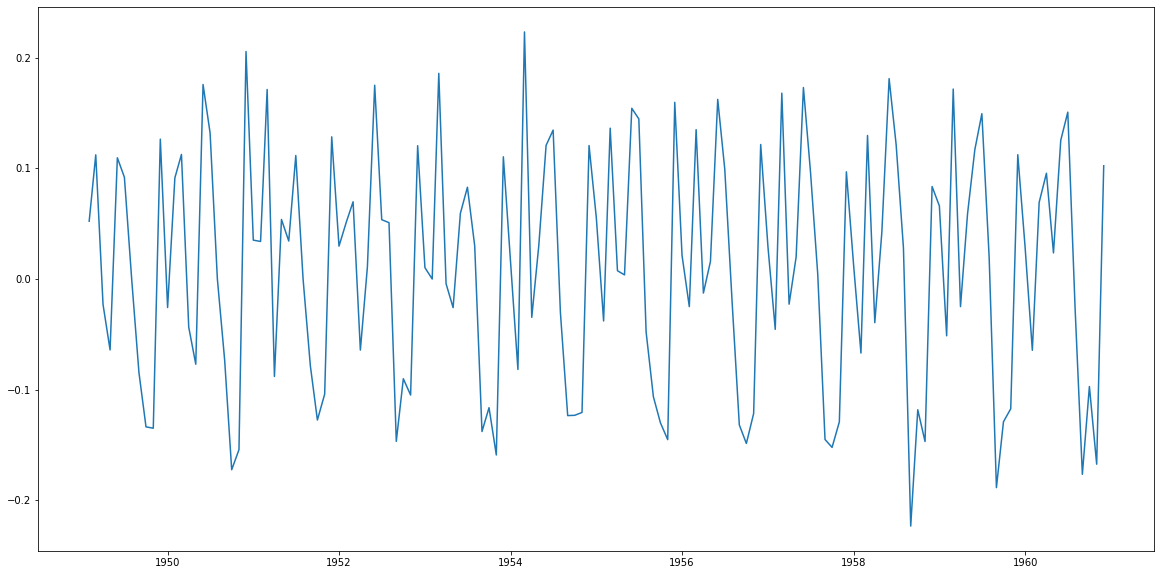

In [21]:
plt.figure(figsize=(20,10))
data_log_diff = (data_log-data_log.shift()).dropna()
plt.plot(data_log_diff)

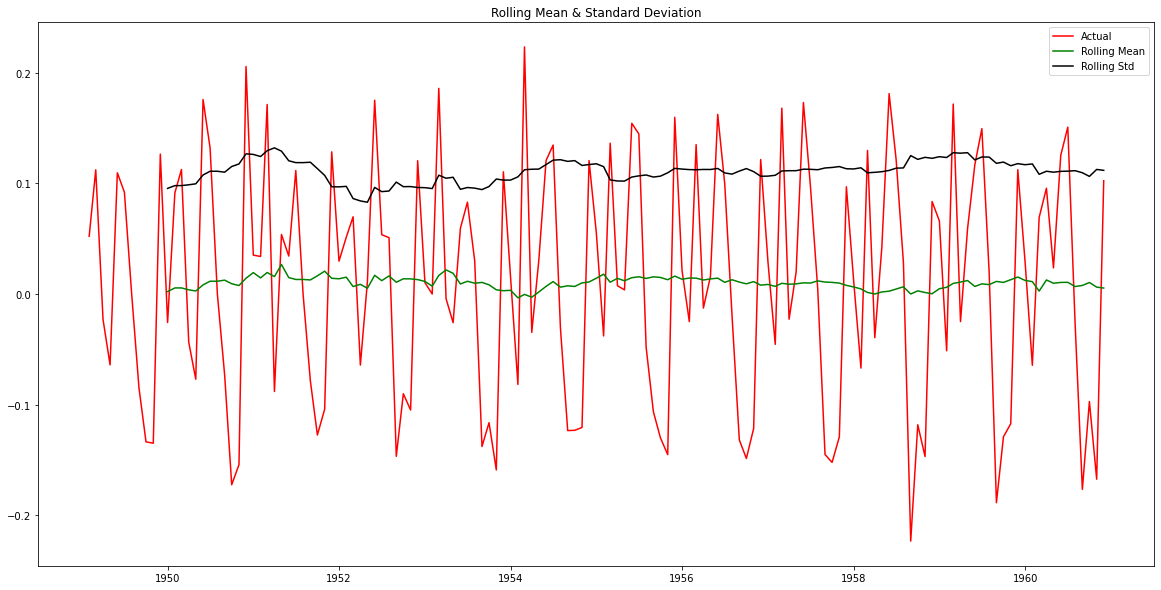

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [22]:
stationarity(data_log_diff)

# 4. Arima : using only the log and differencing transform

- Decomposing Time Series into its components : Trend, Seasonality and Residual

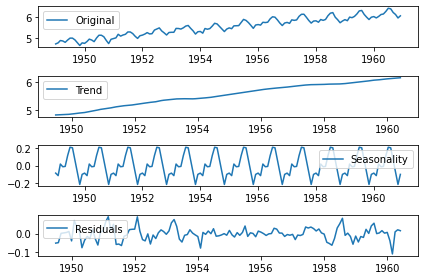

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

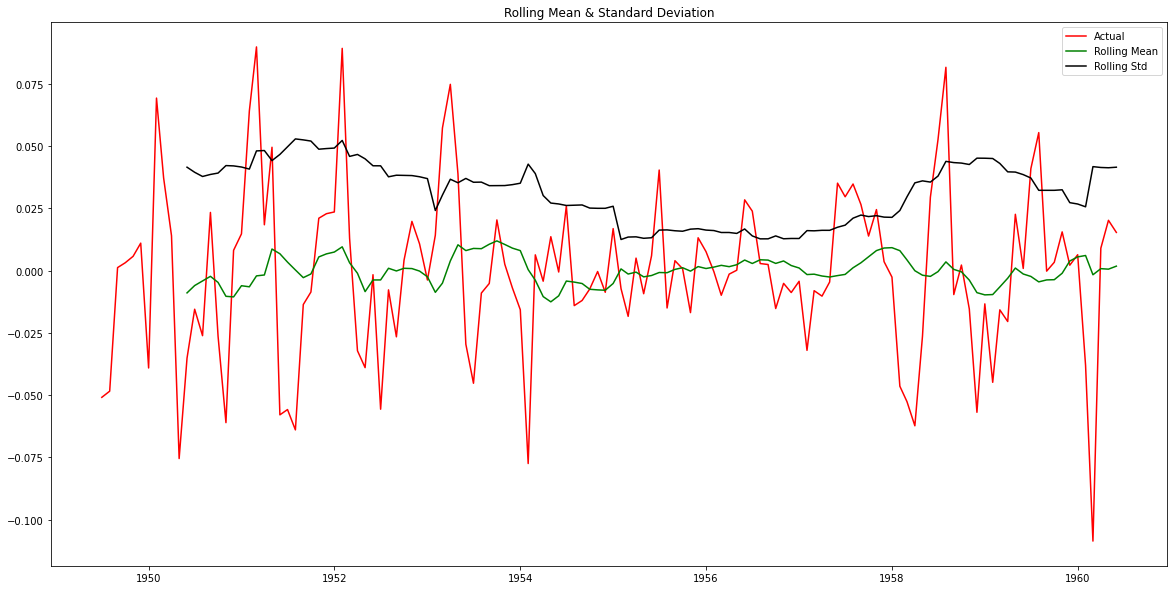

Dickey-Fuller Test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
Lags Used               9.000000e+00
No. of Obs              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [24]:
decomp_data=residual.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

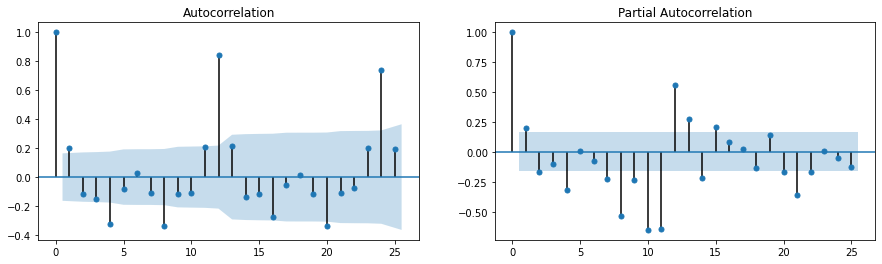

In [25]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(data_log_diff, lags=25, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(data_log_diff, lags=25, ax=axes[1])

Text(0.5, 1.0, 'Partial Autocorrelation Function')

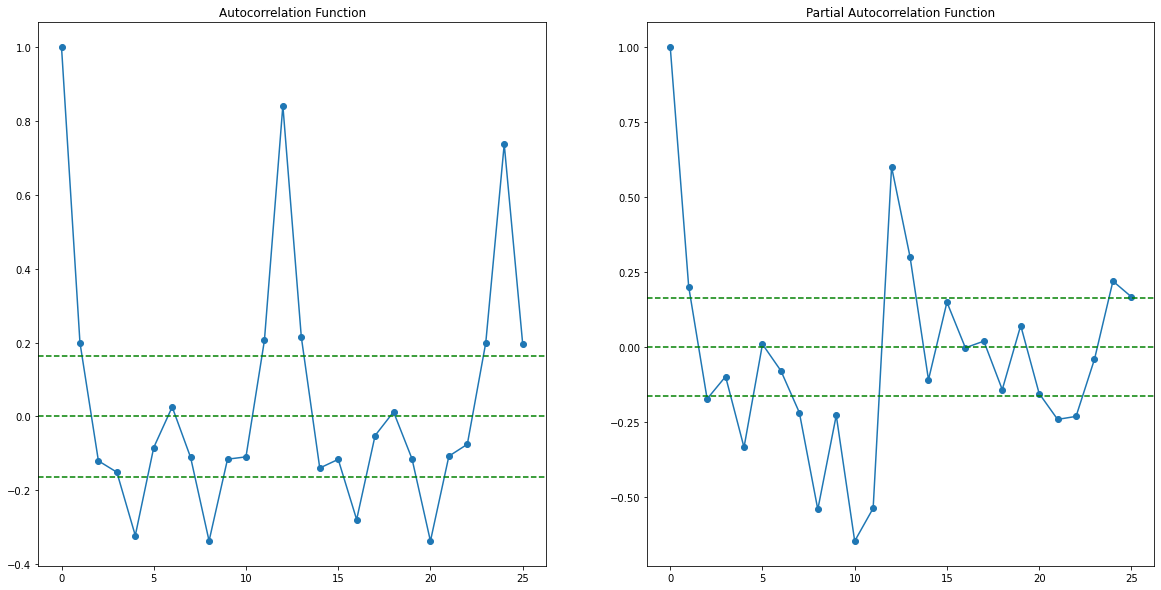

In [26]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_log_diff, nlags=25)
lag_pacf=pacf(data_log_diff, nlags=25, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf,'o-')
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf, 'o-')
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

In [27]:
data_log[:'1959-12-01']

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1959-08-01,6.326149
1959-09-01,6.137727
1959-10-01,6.008813


In [45]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(data_log[:'1959-12-01'], order=(2,1,2)) # keep the last year 1960 as testing
results=model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 136.017
Method:                       css-mle   S.D. of innovations              0.084
Date:                Wed, 19 May 2021   AIC                           -260.035
Time:                        14:46:53   BIC                           -242.784
Sample:                    02-01-1949   HQIC                          -253.025
                         - 12-01-1959                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0101      0.003      3.511      0.001       0.004       0.016
ar.L1.D.Passengers     1.6300      0.040     40.663      0.000       1.551       1.709
ar.L2.D.Passengers  

plotting ARIMA model


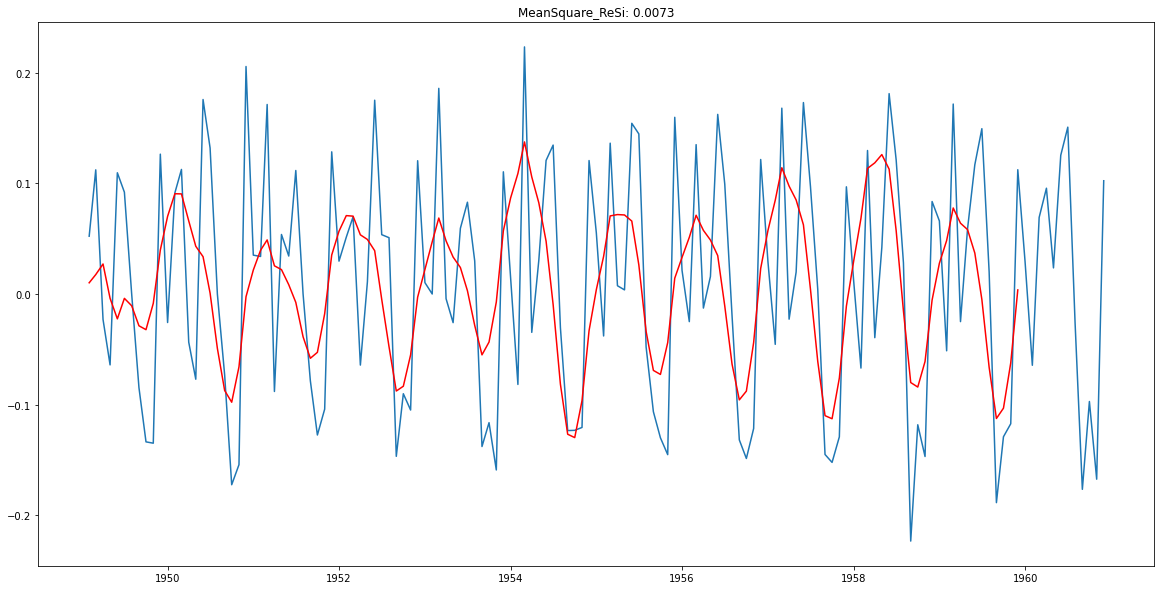

In [46]:

plt.figure(figsize=(20,10))
plt.plot(data_log_diff)
plt.plot(results.fittedvalues, color='red')
plt.title('MeanSquare_ReSi: %.4f'% ((results.fittedvalues-data_log_diff['Passengers'])**2).mean())
print('plotting ARIMA model')

- Fitted values 1949-1959 and predictions 1960

 prediction of ARIMA model is in difference form

In [55]:
Fitting = results.predict(start=pd.to_datetime('1949-02-01'), end=pd.to_datetime('1960-12-01'), dynamic=False)
print(Fitting)

1949-02-01    0.010116
1949-03-01    0.017534
1949-04-01    0.027104
1949-05-01   -0.003908
1949-06-01   -0.022444
                ...   
1960-08-01   -0.034946
1960-09-01   -0.040561
1960-10-01   -0.032100
1960-11-01   -0.013276
1960-12-01    0.009825
Freq: MS, Length: 143, dtype: float64


- Performing Inverse Transformation for differencing by adding shifted data_log to predictions.

In [53]:
predictions_log_diff = data_log.shift().dropna()
predictions_log=predictions_log_diff.add(Fitting, axis=0)

Taking out log transformation and visualizing actual vs predicted value 

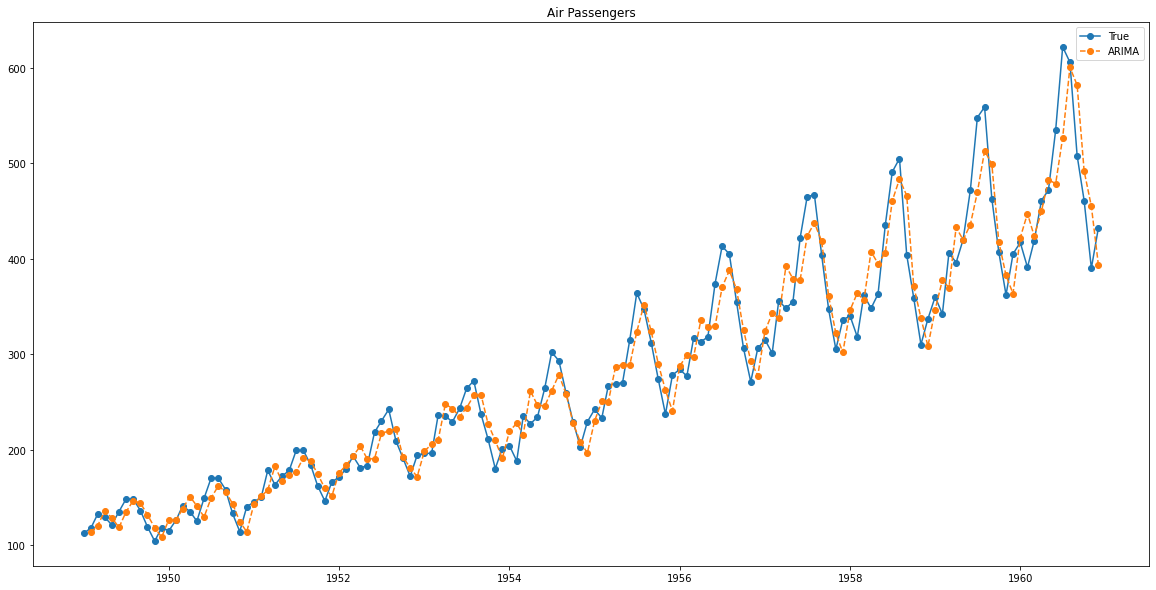

In [54]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data, 'o-', label='True')
plt.plot(predictions_ARIMA, 'o--', label='ARIMA')
plt.legend(loc='best')
plt.title('Air Passengers')
plt.show()

## !!! We see this is not a bad model, even though we only used log transform.

## fit model with full data and Plot 10 year forecast

- predict the mean forecast

In [59]:
model=ARIMA(data_log, order=(2,1,2)) # Fit the full data
results=model.fit()

In [62]:
predictions= results.predict(start=pd.to_datetime('1961-01-01'), end=pd.to_datetime('1970-12-01'), dynamic=False)
# Since prediction is in difference form, we add 1960-12-01 data_log value  to the predicted 1961-01-01 data_log_diff value
predictions[0] += data_log[-1:].values
predictions = predictions.cumsum() # cumulative sum will recover the data_log prediction
predictions

1961-01-01    6.095534
1961-02-01    6.152814
1961-03-01    6.224430
1961-04-01    6.292411
1961-05-01    6.341647
                ...   
1970-08-01    7.317839
1970-09-01    7.327341
1970-10-01    7.336898
1970-11-01    7.346508
1970-12-01    7.356158
Freq: MS, Length: 120, dtype: float64

In [61]:
predict_date = pd.date_range(start ="1961-01-01", end= "1970-12-31",  freq="M")
# make time 
predict_date = pd.to_datetime(predict_date.to_numpy().astype('datetime64[M]'))
predict_date

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01',
               ...
               '1970-03-01', '1970-04-01', '1970-05-01', '1970-06-01',
               '1970-07-01', '1970-08-01', '1970-09-01', '1970-10-01',
               '1970-11-01', '1970-12-01'],
              dtype='datetime64[ns]', length=120, freq=None)

In [63]:
predictions_ARIMA=pd.DataFrame(np.exp(predictions), index=predict_date, columns=['Passengers'])
predictions_ARIMA

,Passengers
1961-01-01,443.871029
1961-02-01,470.038319
1961-03-01,504.935071
1961-04-01,540.454867
1961-05-01,567.730690
...,...
1970-08-01,1506.943206
1970-09-01,1521.331822
1970-10-01,1535.939680
1970-11-01,1550.771546


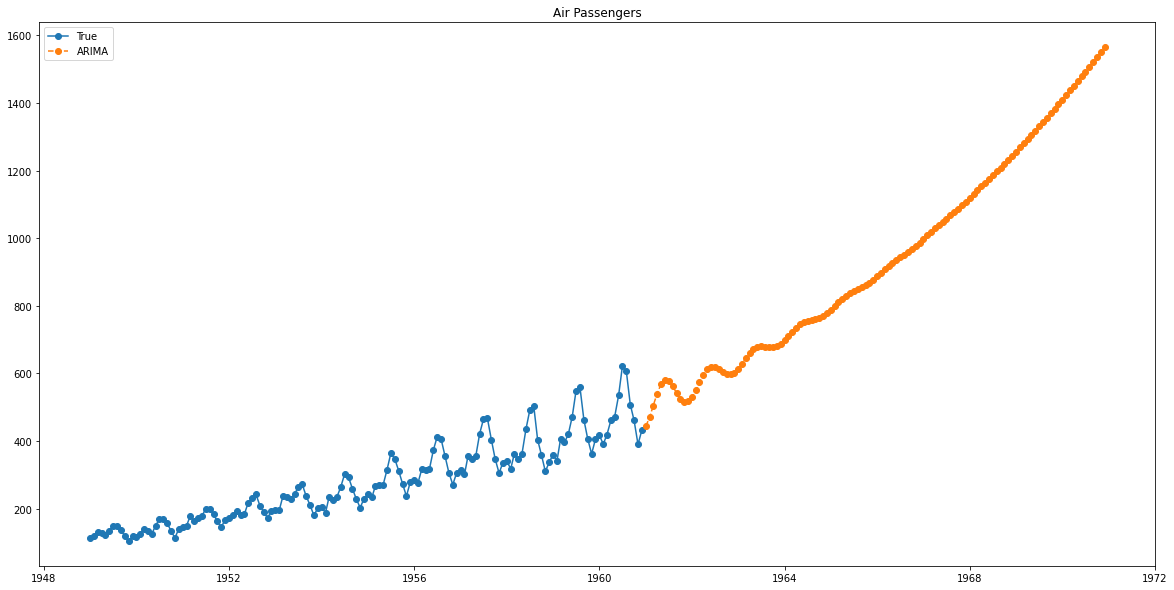

In [64]:

plt.figure(figsize=(20,10))
plt.plot(data, 'o-', label='True')
plt.plot(predictions_ARIMA, 'o--', label='ARIMA')
plt.legend(loc='best')
plt.title('Air Passengers')
plt.show()

- Plotting forecast of next 10 years with 95% confidence interval

In [ ]:
predictions = results.forecast(steps=120)
predictions # predictions[0] is mean, [1] is std; [2] is confidence interval

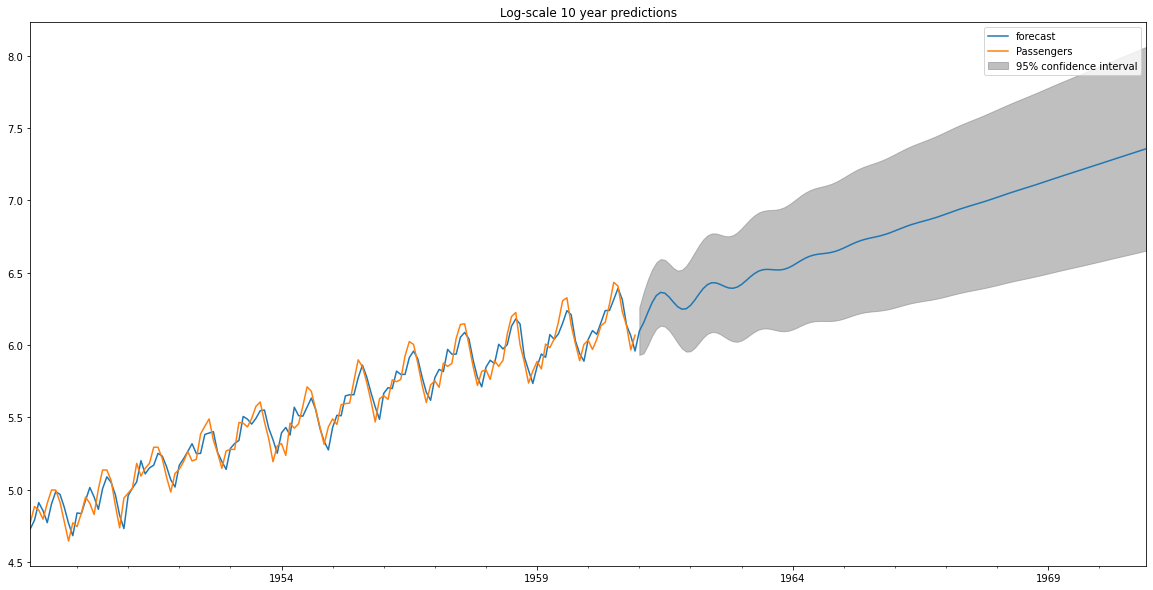

In [66]:
rcParams['figure.figsize']=20,10
results.plot_predict(start=pd.to_datetime('1949-02-01'),end=pd.to_datetime('1970-12-01') )
plt.title('Log-scale 10 year predictions')
plt.show()

# 5. Seasonal Arima: Good model

## Grid search the p, d, q parameters

In [67]:
%%time
import itertools
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

CPU times: user 22 µs, sys: 4 µs, total: 26 µs
Wall time: 29.3 µs


In [ ]:
%%time
''' 
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,    
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

'''

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 2044.4329486427587
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 1887.1369742369352
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 1498.2861802591833
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 1315.9211929474204
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 1156.2914901508518
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 1016.1362797336317
ARIMA(0, 0, 0) x (0, 2, 0, 12) - AIC: 1103.8641596218804
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 942.185608844917
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 834.301730345852
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 1118.6259190717344
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 1107.2562043235441
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 1014.6452265989153
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 1109.2437994445113
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 1033.6172166730469
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 904.4213211129456
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 974.4396269851046
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 940.2370895732163
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 

Best Result: [(2, 1, 2), (0, 2, 2, 12), 715.1569369855482]

CPU times: user 20min 47s, sys: 1min 33s, total: 22min 20s
Wall time: 20min 22s

## Plot model diagnostics

In [68]:
import statsmodels.api as sm
best_result = [(2, 1, 2), (0, 2, 2, 12), 715.1569369855482]
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1856      0.195     -6.092      0.000      -1.567      -0.804
ar.L2         -0.4353      0.099     -4.411      0.000      -0.629      -0.242
ma.L1          0.7787      0.204      3.812      0.000       0.378       1.179
ma.S.L12      -1.4145      0.227     -6.239      0.000      -1.859      -0.970
ma.S.L24       0.4839      0.143      3.381      0.001       0.203       0.764
sigma2       118.5130     28.038      4.227      0.000      63.560     173.466


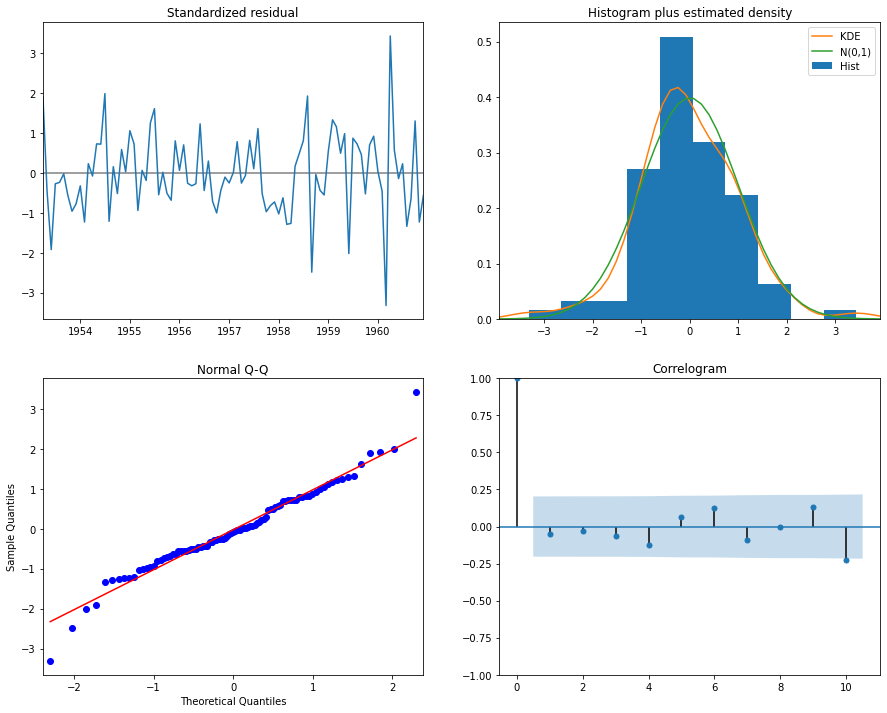

In [69]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Plot one-step ahead forecast

In [70]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

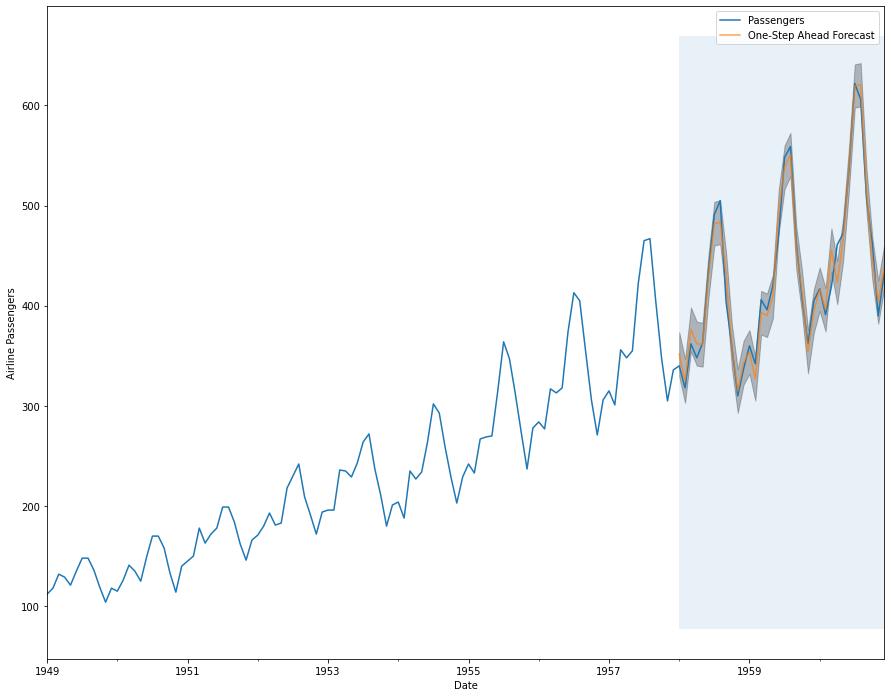

In [71]:
ax = data['1949':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [72]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = data.Passengers['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 194.81


## Plot dynamic forecast

One-step-ahead prediction uses the true values of the endogenous values at each step to predict the next in-sample value. 

Dynamic predictions use one-step-ahead prediction up to some point in the dataset (specified by the dynamic argument); after that, the previous predicted endogenous values are used in place of the true endogenous values for each new predicted element.

In [73]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

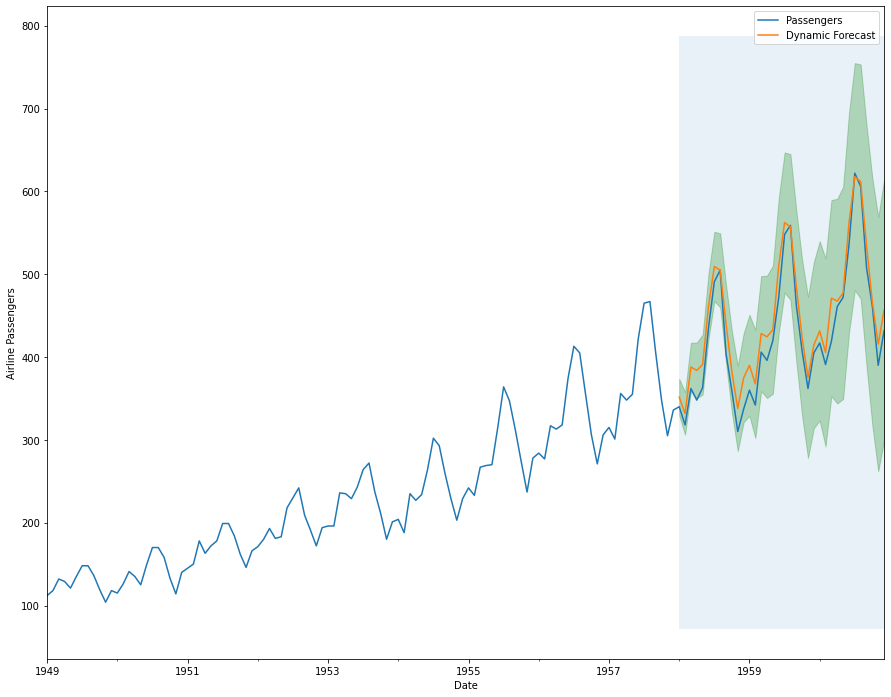

In [74]:
ax = data['1949':].plot(label='Observed', figsize=(15, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='g', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [75]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = data.Passengers['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 551.55


## Plot 2-year forecast

In [76]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

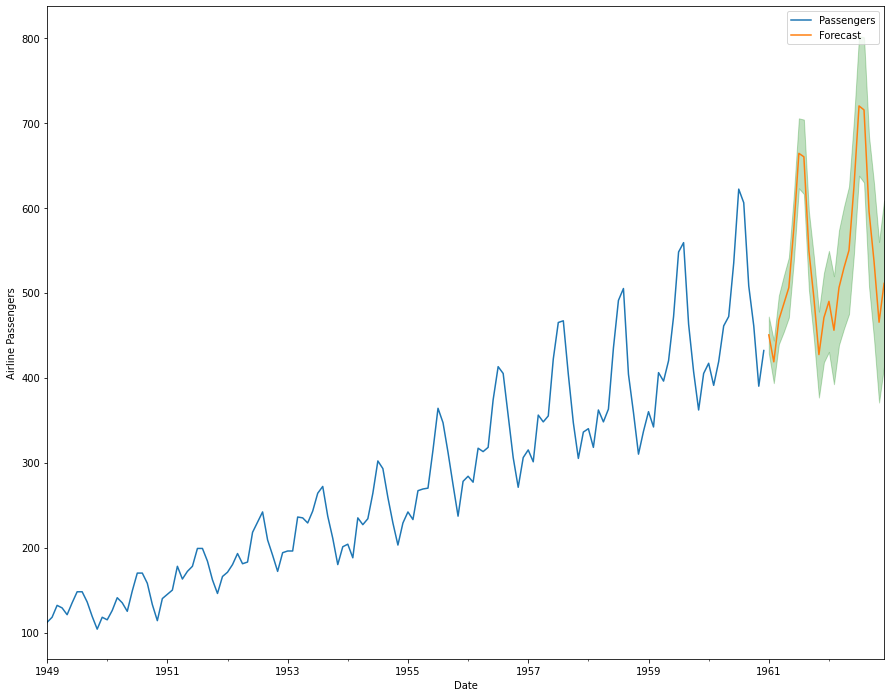

In [77]:
ax = data.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()